## For US bike-sharing provider BoomBikes develops business plan to increase its revenue

##### You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Bike Sharing dataset

##### The service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors

In [1058]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [942]:
bike_demand = pd.read_csv('day.csv')

In [943]:
bike_demand.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Drop unnecessary columns and keeping it as a copy

In [944]:
copy_data = bike_demand.drop(columns = ['instant', 'holiday', 'casual', 'registered', 'dteday'], inplace = False)

In [945]:
copy_data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Check basic information

In [946]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


In [947]:
copy_data.describe()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### EDA 

##### Univariate Analysis

C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


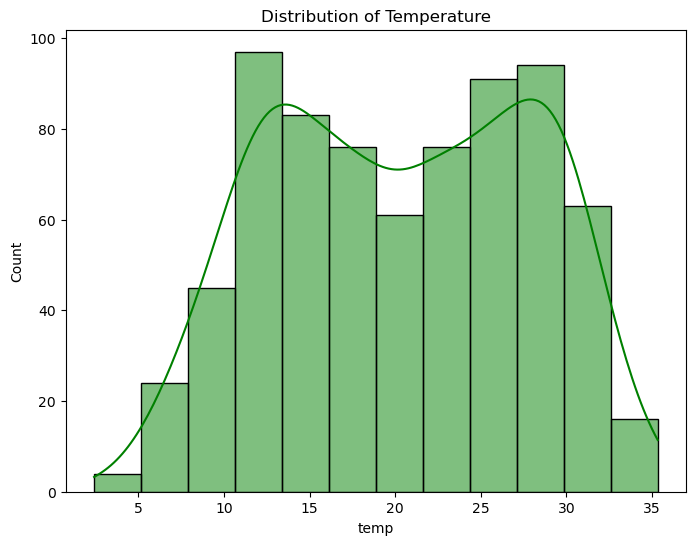

In [948]:
# Temperature

plt.figure(figsize=(8,6))
sns.histplot(copy_data['temp'], kde = True, color = 'green')
plt.title('Distribution of Temperature')
plt.show()

C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


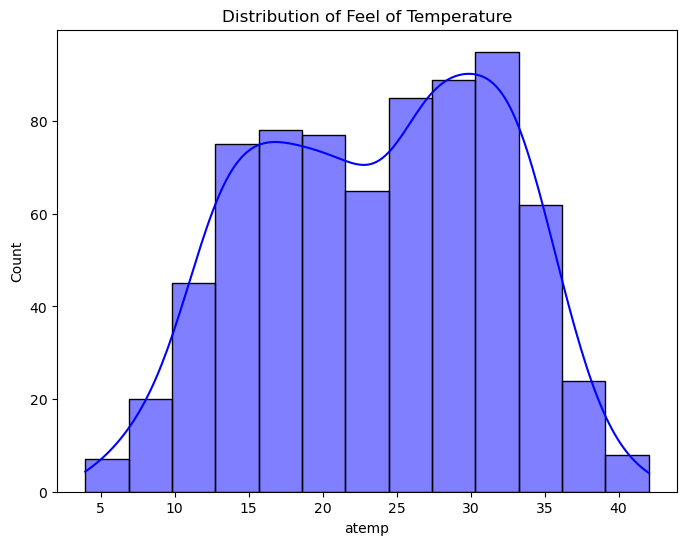

In [949]:
# Temperature Feel

plt.figure(figsize=(8,6))
sns.histplot(copy_data['atemp'], kde = True, color = 'blue')
plt.title('Distribution of Feel of Temperature')
plt.show()

C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


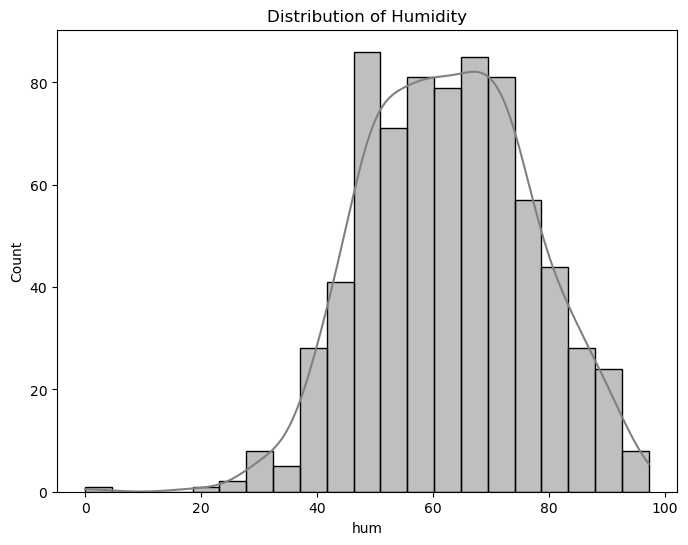

In [950]:
# Humidity

plt.figure(figsize=(8,6))
sns.histplot(copy_data['hum'], kde = True, color = 'grey')
plt.title('Distribution of Humidity')
plt.show()

C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


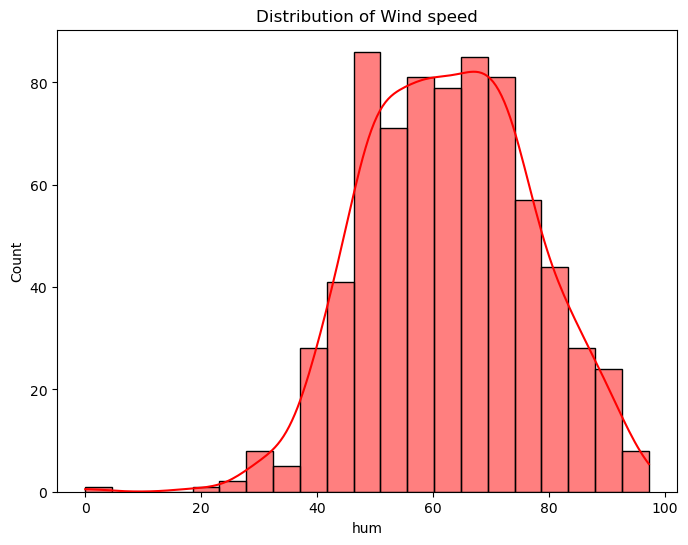

In [951]:
# Wind speed

plt.figure(figsize=(8,6))
sns.histplot(copy_data['hum'], kde = True, color = 'red')
plt.title('Distribution of Wind speed')
plt.show()

C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


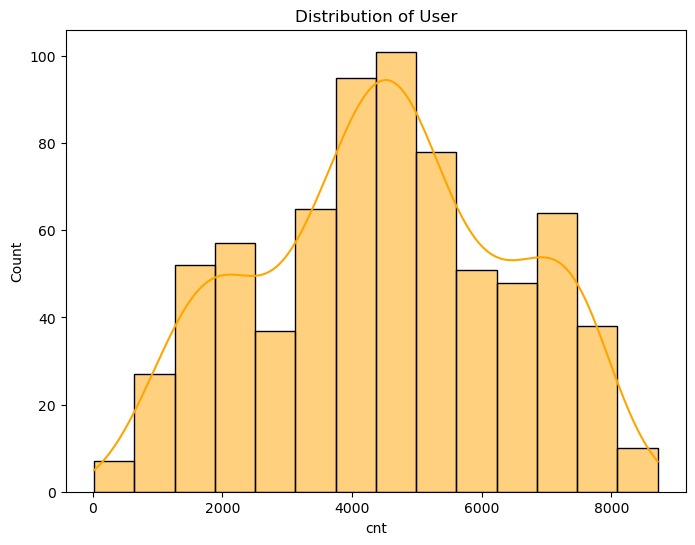

In [952]:
# User count including both registerd and casual

plt.figure(figsize=(8,6))
sns.histplot(copy_data['cnt'], kde = True, color = 'orange')
plt.title('Distribution of User')
plt.show()

In [953]:
# Create a season mapping for demonstration

season_mapping = ['Spring', 'Summer', 'Fall', 'Winter']

# Create a Year mapping for demonstration

year = ['2018', '2019']

# Create a Month mapping for demonstration

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a Weather mapping for demonstration

weather_mapping = ['Clear, Few clouds, Partly cloudy, Partly cloudy', 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']

# Create a Working and Non-working day mapping for demonstration

workingDay_mapping = ['Non-Working', 'Workking']

# Create a Day mapping for demonstration

day_mapping = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday']

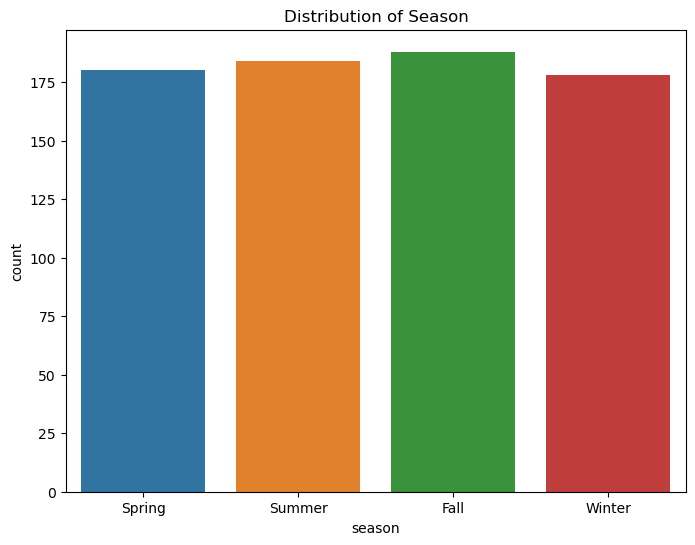

In [954]:
# Distribution of Categotical variables - Season

plt.figure(figsize=(8,6))
sns.countplot(x='season', data = copy_data)
plt.xticks([0, 1, 2, 3], season_mapping)
plt.title('Distribution of Season')
plt.show()


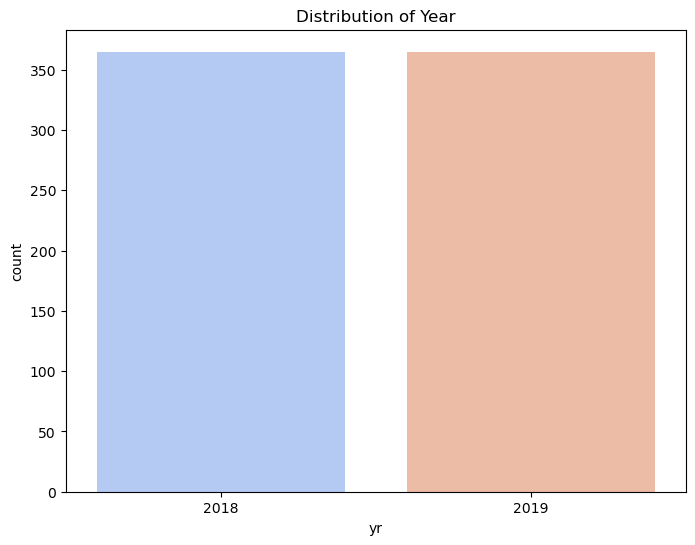

In [955]:
# Distribution of Categotical variables - Year

plt.figure(figsize=(8,6))
sns.countplot(x='yr', data = copy_data, palette = 'coolwarm')
plt.xticks([0, 1], year)
plt.title('Distribution of Year')
plt.show()

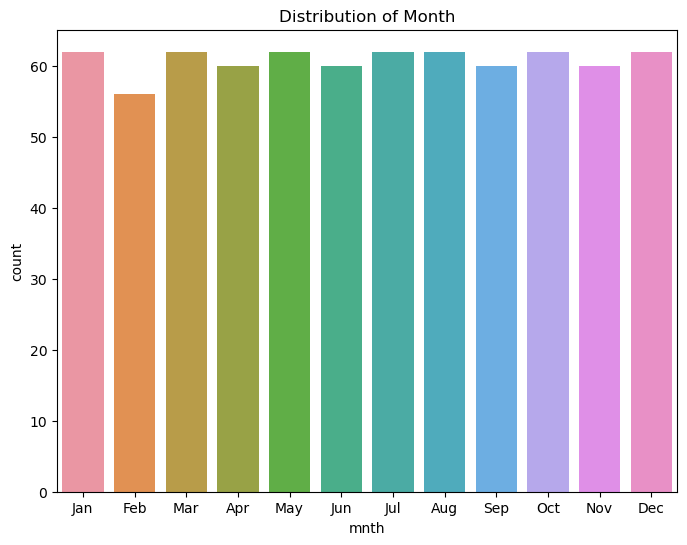

In [956]:
# Distribution of Categotical variables - Months  

plt.figure(figsize=(8,6))
sns.countplot(x='mnth', data = copy_data)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], month)
plt.title('Distribution of Month')
plt.show()

In [957]:
copy_data.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [958]:
copy_data.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

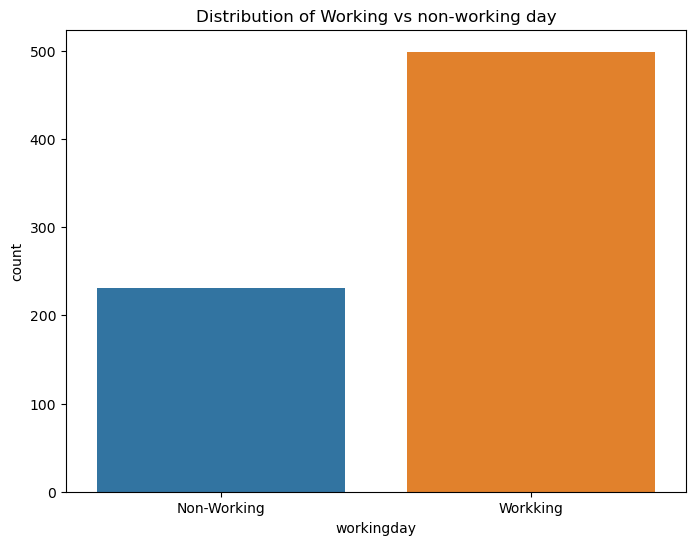

In [959]:
# Distribution of Categotical variables - Working vs Non Working  

plt.figure(figsize=(8,6))
sns.countplot(x='workingday', data = copy_data)
plt.xticks([0, 1], workingDay_mapping)
plt.title('Distribution of Working vs non-working day')
plt.show()

In [960]:
copy_data.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

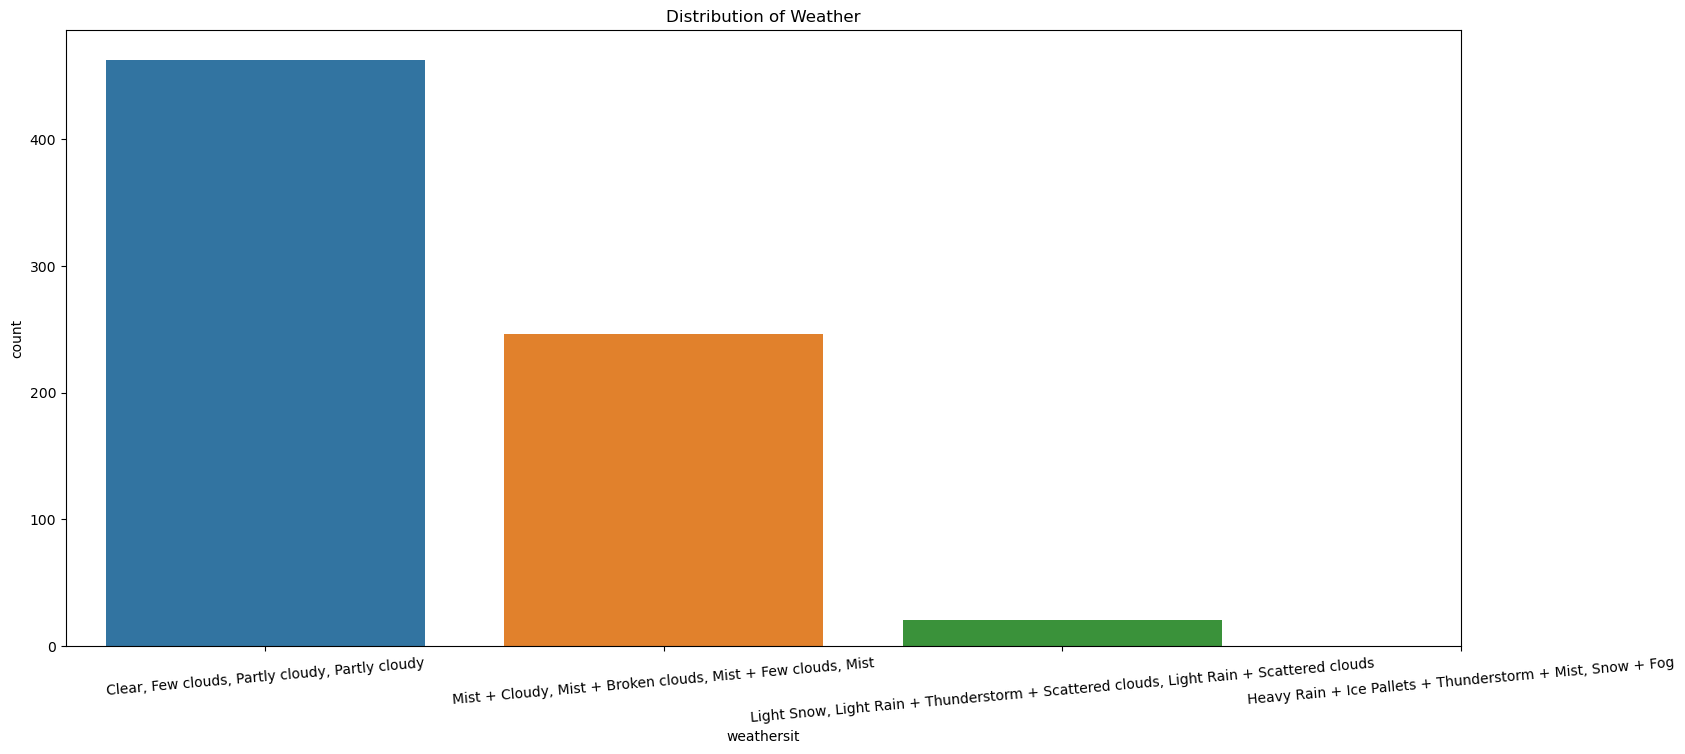

In [961]:
# Distribution of Categotical variables - Weather  

plt.figure(figsize=(18,8))
sns.countplot(x='weathersit', data = copy_data)
plt.xticks([0, 1, 2, 3], weather_mapping, rotation = 5)
plt.title('Distribution of Weather')
plt.show()

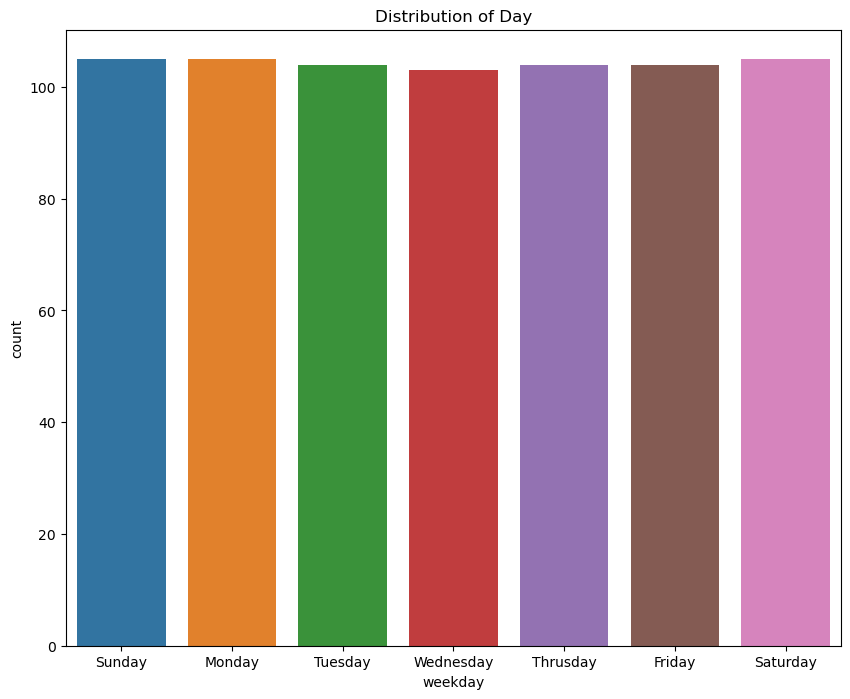

In [962]:
# Distribution of Categotical variables - Day wise  

plt.figure(figsize=(10,8))
sns.countplot(x='weekday', data = copy_data)
plt.xticks([0, 1, 2, 3, 4, 5, 6], day_mapping)
plt.title('Distribution of Day')
plt.show()

In [963]:
copy_data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Bivariate Analysis
###### Plot relationship between continous variable and Total user

##### Temprature vs Total user

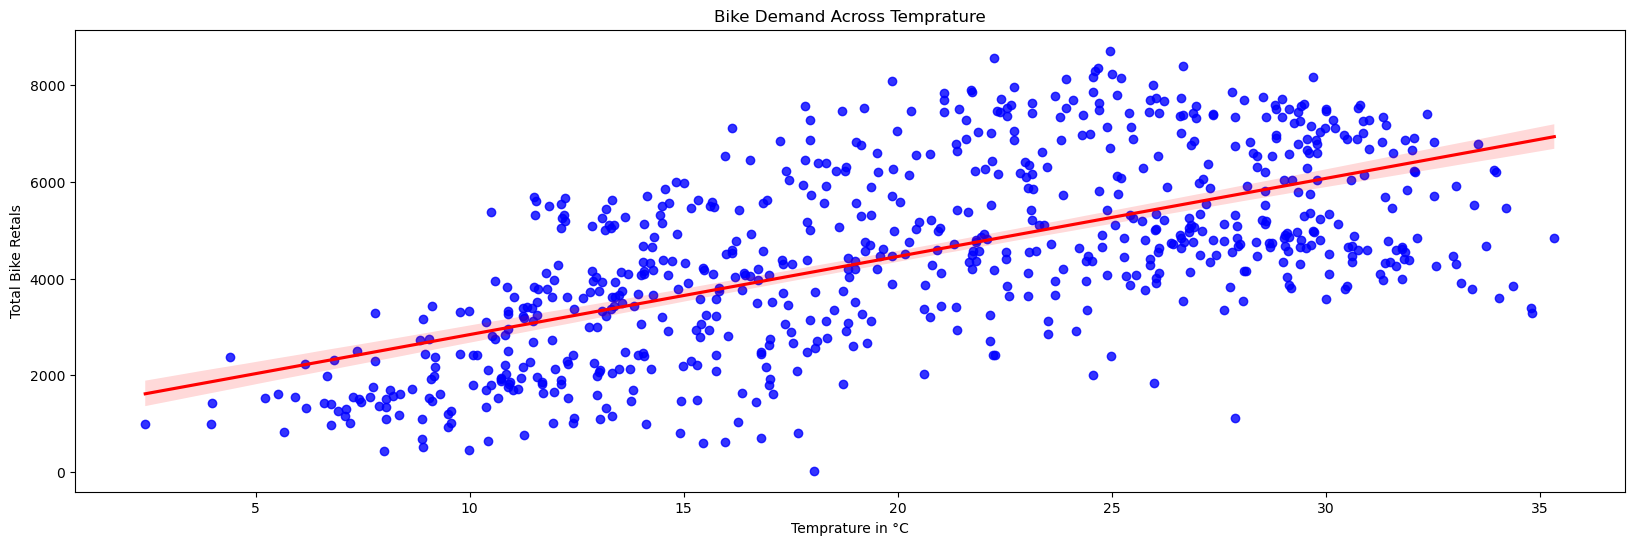

In [964]:
plt.figure(figsize=(20, 6))
sns.regplot(x = 'temp', y = 'cnt', data = copy_data, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
plt.title('Bike Demand Across Temprature')
plt.xlabel('Temprature in °C')
plt.ylabel('Total Bike Retals')
plt.show()

##### Temprature feeling vs Total user

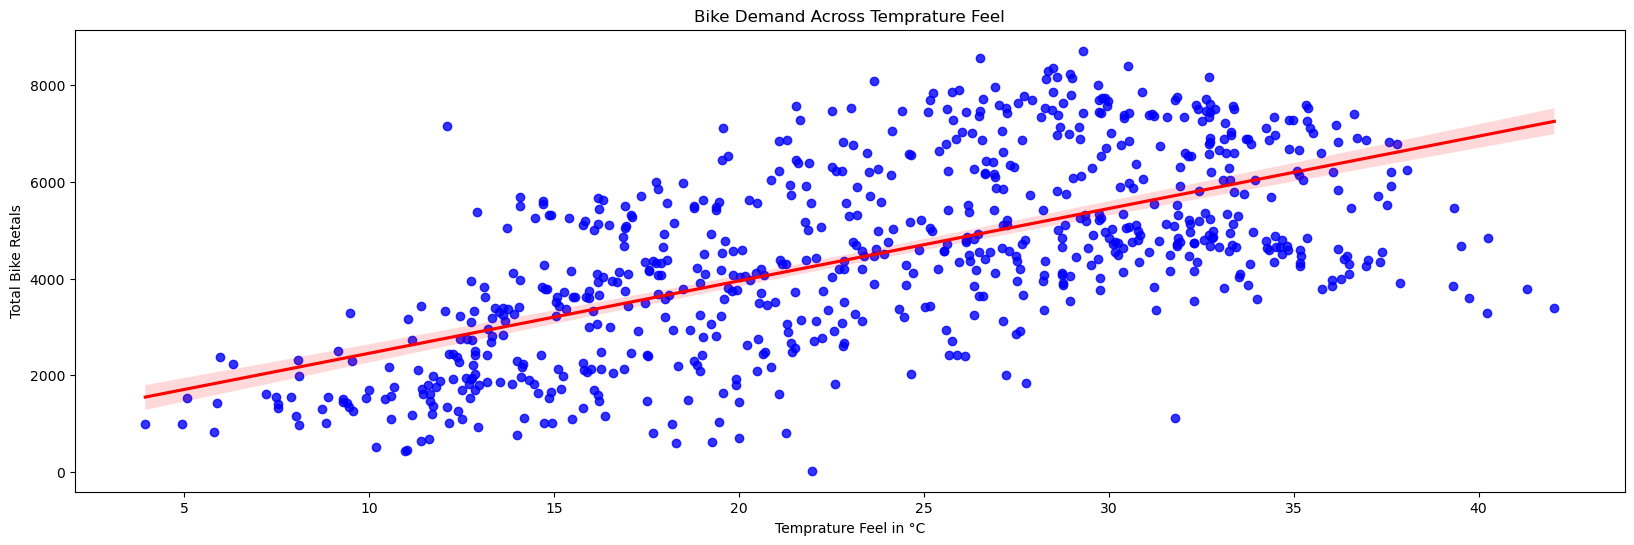

In [965]:
plt.figure(figsize=(20, 6))
sns.regplot(x = 'atemp', y = 'cnt', data = copy_data, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
plt.title('Bike Demand Across Temprature Feel')
plt.xlabel('Temprature Feel in °C')
plt.ylabel('Total Bike Retals')
plt.show()

##### Humidity vs Total user

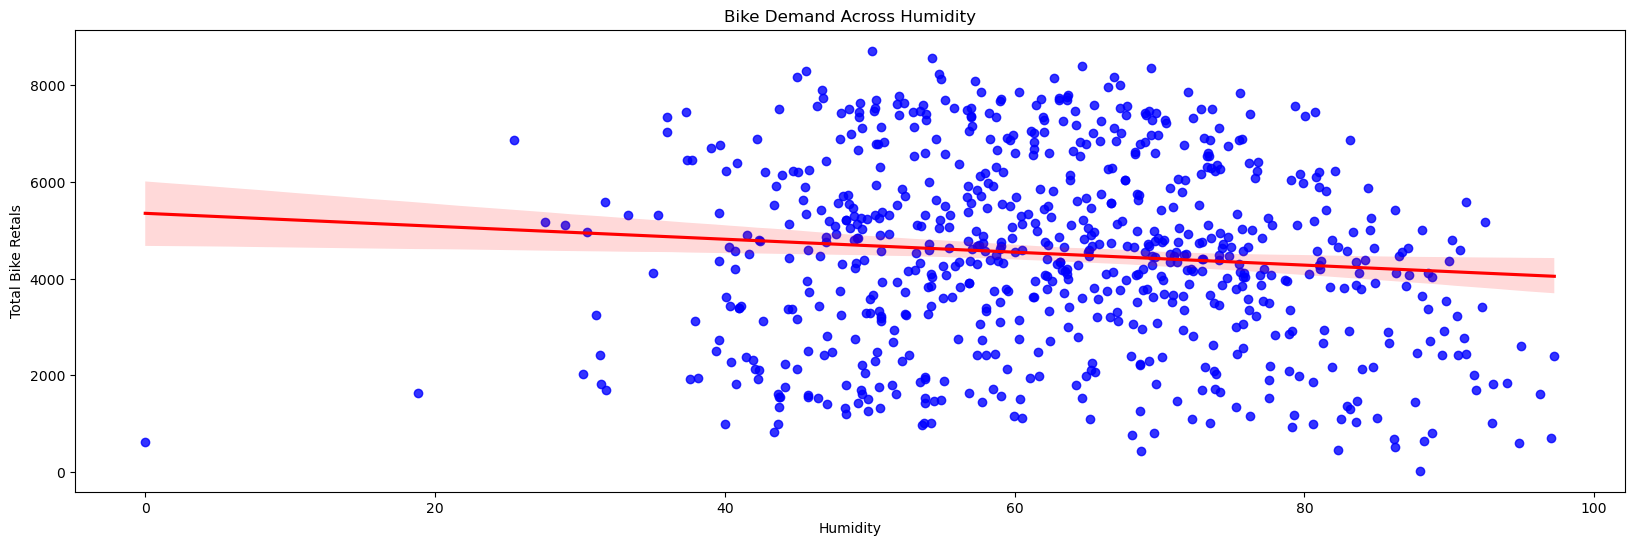

In [966]:
plt.figure(figsize=(20, 6))
sns.regplot(x = 'hum', y = 'cnt', data = copy_data, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
plt.title('Bike Demand Across Humidity')
plt.xlabel('Humidity')
plt.ylabel('Total Bike Retals')
plt.show()

##### Wind Speed vs Total user

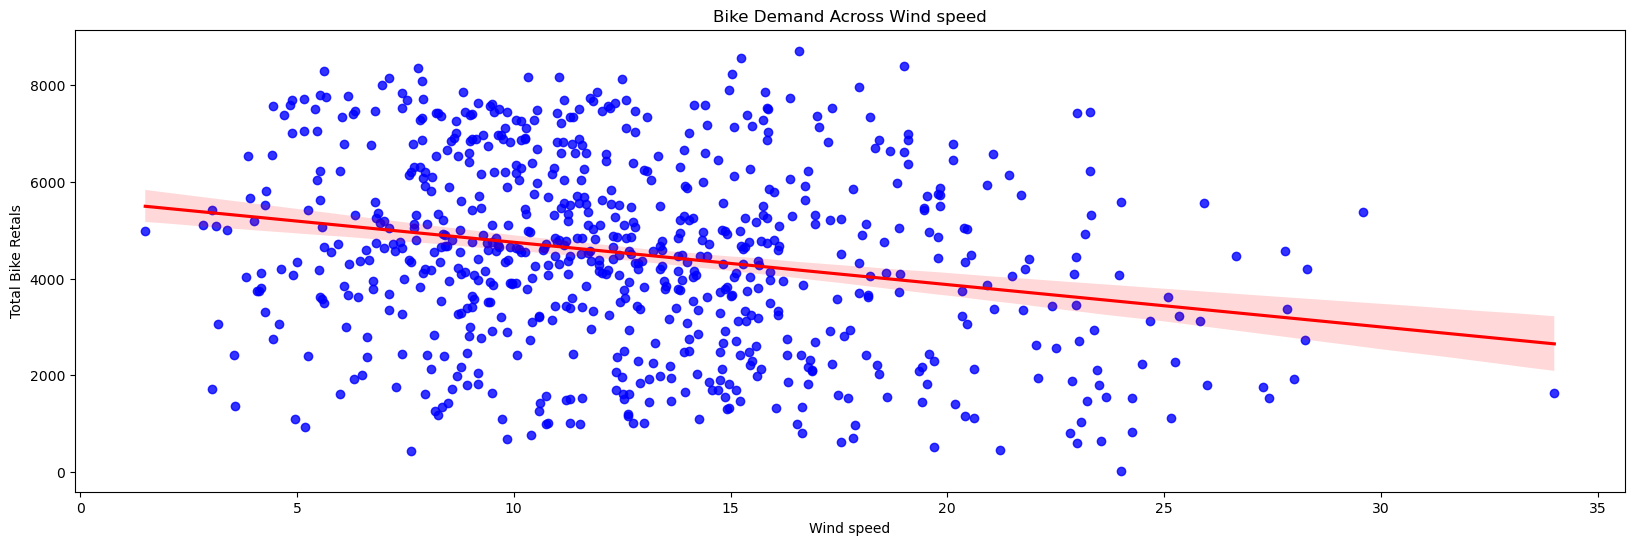

In [967]:
plt.figure(figsize=(20, 6))
sns.regplot(x = 'windspeed', y = 'cnt', data = copy_data, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
plt.title('Bike Demand Across Wind speed')
plt.xlabel('Wind speed')
plt.ylabel('Total Bike Retals')
plt.show()

##### Weather vs Total User

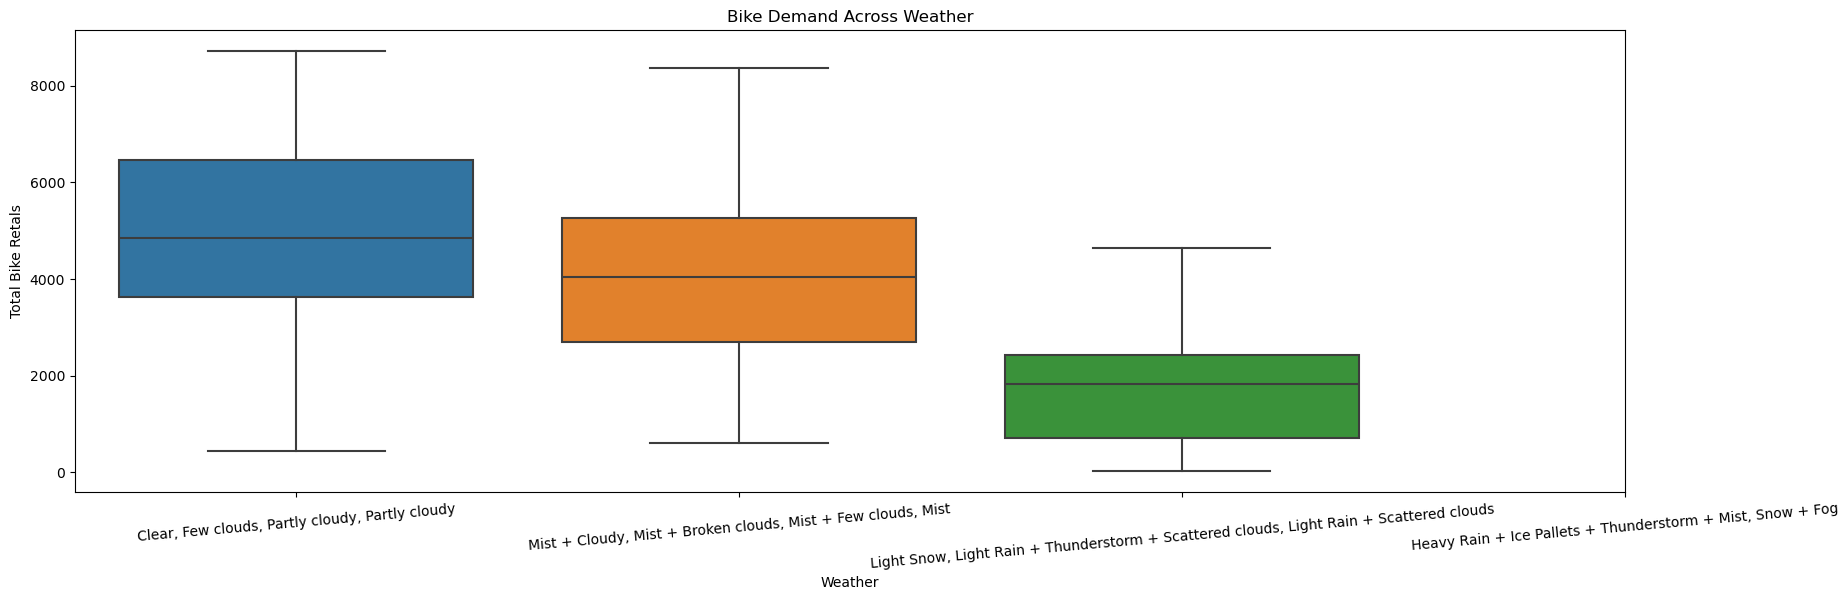

In [968]:
plt.figure(figsize=(20,6))
sns.boxplot(x = 'weathersit', y = 'cnt', data = copy_data)
plt.xticks([0, 1, 2, 3], weather_mapping, rotation = 5)
plt.title('Bike Demand Across Weather')
plt.xlabel('Weather')
plt.ylabel('Total Bike Retals')
plt.show()

##### Year vs Total User

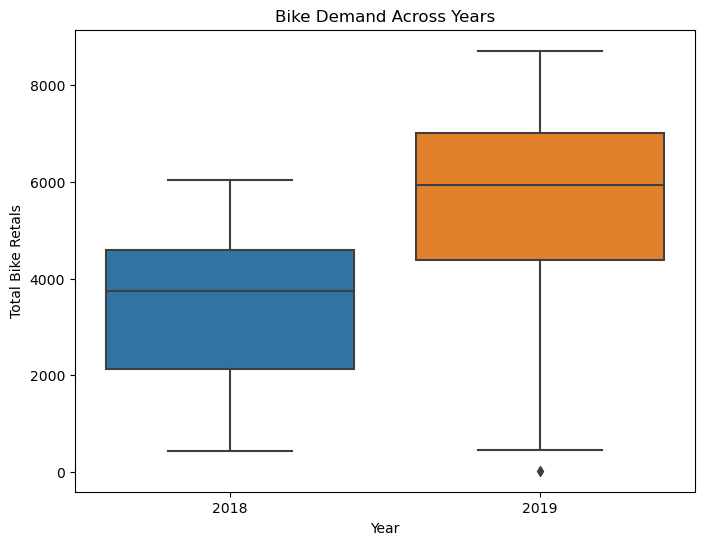

In [969]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'yr', y = 'cnt', data = copy_data)
plt.xticks([0, 1], year)
plt.title('Bike Demand Across Years')
plt.xlabel('Year')
plt.ylabel('Total Bike Retals')
plt.show()

##### Month - Year vs Total User

In [970]:
months_mapping = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
year_mapping = {0:'2018', 1:'2019'}

backup_data = pd.DataFrame(copy_data)

backup_data['month-year'] = backup_data['mnth'].map(months_mapping).astype(str) + ' - ' + backup_data['yr'].map(year_mapping).astype(str) 

backup_data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month-year
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,Jan - 2018
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,Jan - 2018
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,Jan - 2018
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,Jan - 2018
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,Jan - 2018


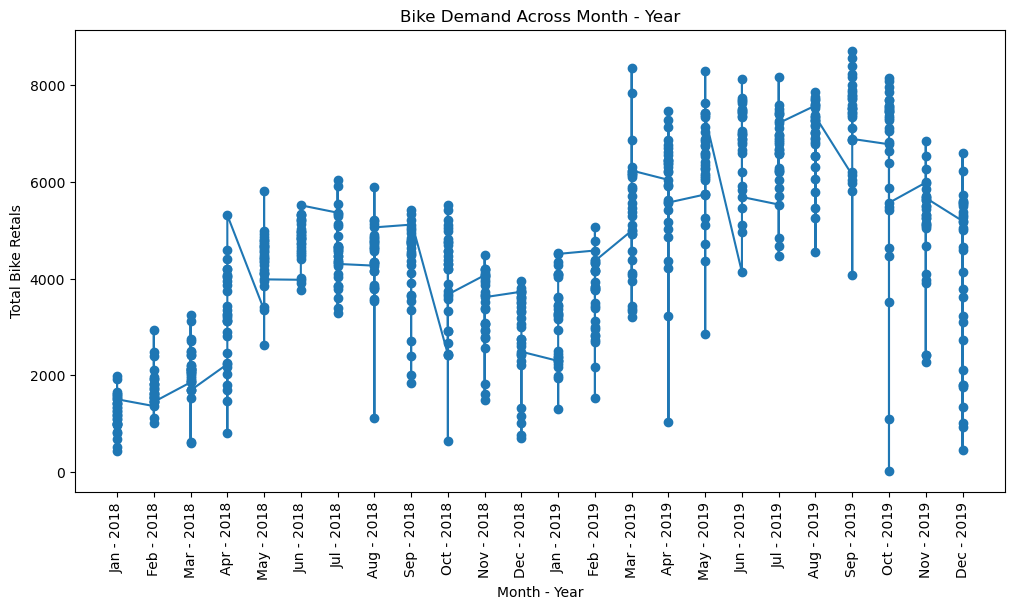

In [971]:
plt.figure(figsize=(12, 6))
plt.plot(backup_data['month-year'], backup_data['cnt'], marker = 'o')
plt.xticks(rotation = 90)
plt.title('Bike Demand Across Month - Year')
plt.xlabel('Month - Year')
plt.ylabel('Total Bike Retals')
plt.show()

##### Season vs Total User

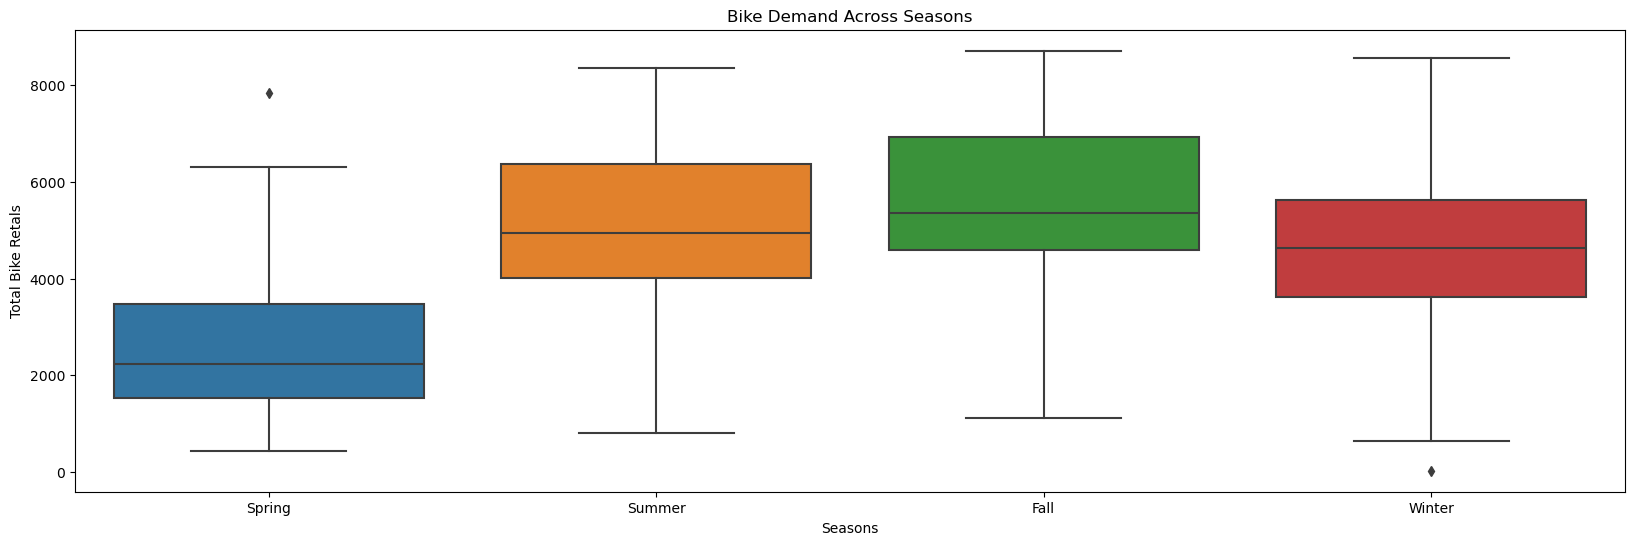

In [972]:
plt.figure(figsize=(20, 6))
sns.boxplot(x = 'season', y = 'cnt', data = copy_data)
plt.xticks([0, 1, 2, 3], season_mapping)
plt.title('Bike Demand Across Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Bike Retals')
plt.show()

##### Daywise vs Total User

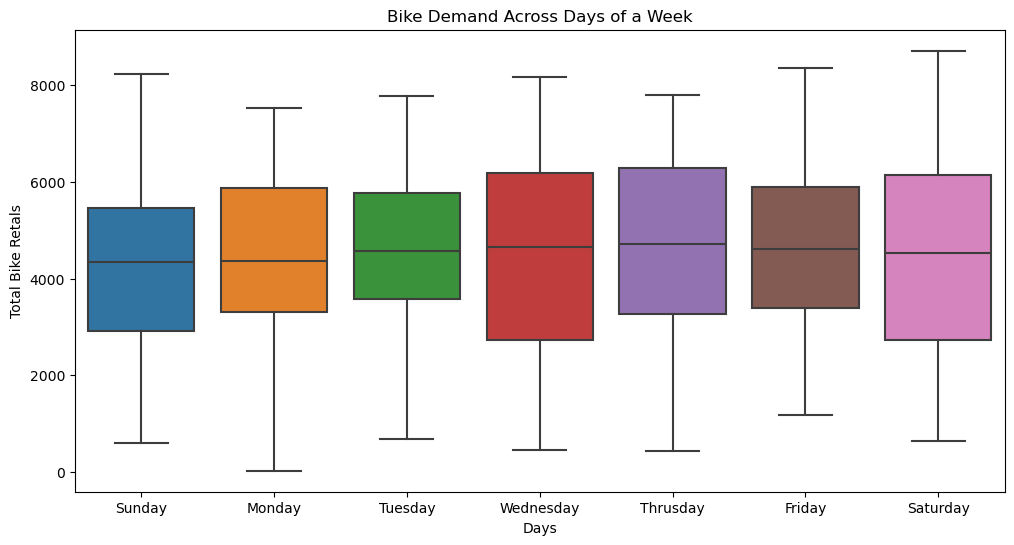

In [973]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'weekday', y = 'cnt', data = copy_data)
plt.xticks([0, 1, 2, 3, 4, 5, 6], day_mapping)
plt.title('Bike Demand Across Days of a Week')
plt.xlabel('Days')
plt.ylabel('Total Bike Retals')
plt.show()

##### Correlation Matrix

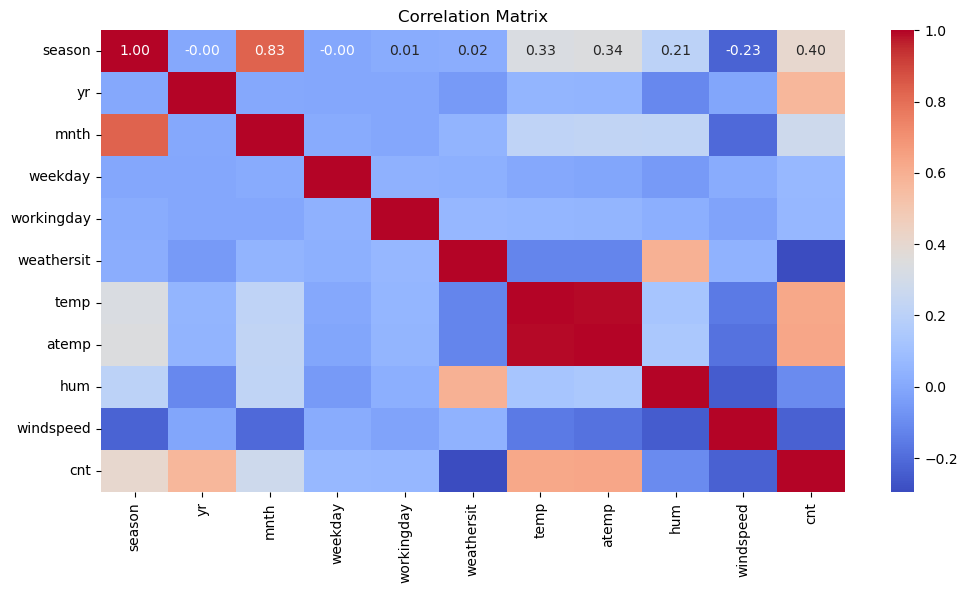

In [974]:
corrMatrix = copy_data.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corrMatrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

##### Pair Plot

C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

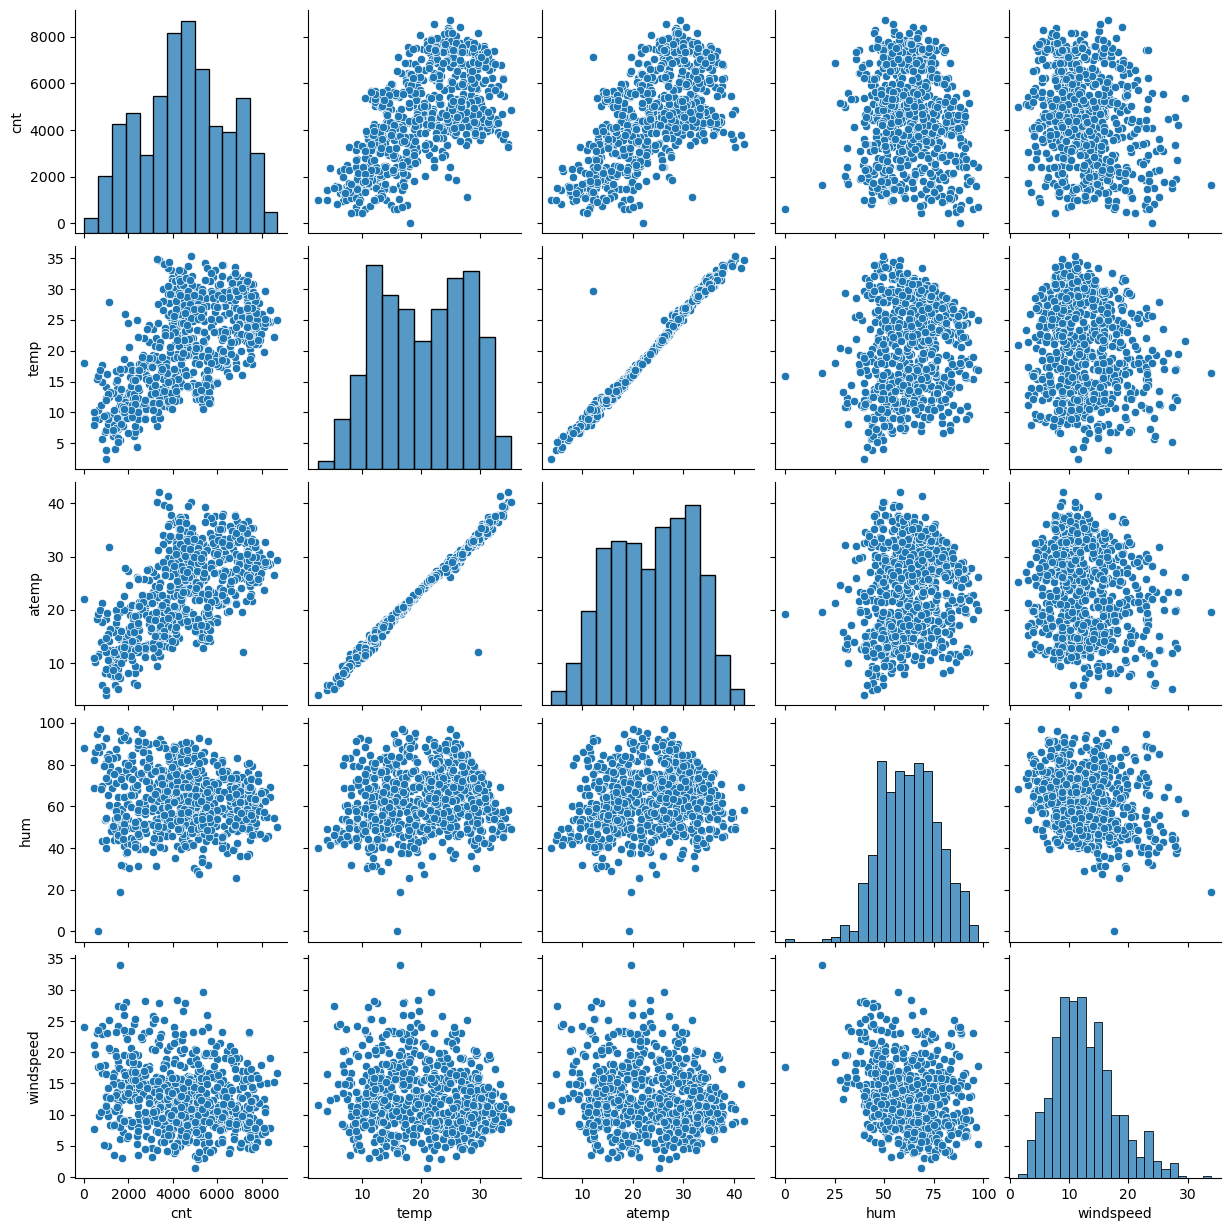

In [975]:
sns.pairplot(copy_data[['cnt', 'temp', 'atemp', 'hum', 'windspeed']])
plt.show()

#### Major Inference from EDA

1. with rise in Temperature, the number of bike rental increases.
2. Similarly, with rise in Feel of Temperature, the number of bike rental increases
3. Slight decline in number of bike rental with rise of Humidity where majorly Humidity ranges roughly from 40 to 80
4. With rise of wind speed, there is a decline in number of bike rental
5. Majority of bike rental happens where the weather is Clear, Few clouds, partly cloudy and the rental gradually decreases as the weather deteriorates.
6. During Heavy rainfall/snow there is no bike rentals
7. There is a steep rise in number of bike rentals in 2019 compared to 2018 to be precise post March 2019
8. Majority of bike rental has been observed in fall season and least Spring.pring”
 Spring Spring Spring

### Model Building

##### Preparing Data for Modelling

In [976]:
copy_data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [977]:
# Exchanging values to Seasons and Weather as per details provided

In [978]:
# Create a season mapping dictionary
season_mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

#appending the values 
copy_data['season'] = copy_data['season'].map(season_mapping)


# Create a Weather mapping dictionary
weather_mapping = {1:'Clear', 2:'Mist', 3:'Light Snow-Rain', 4:'Heavy Snow-Rain'}

#appending the values 
copy_data['weathersit'] = copy_data['weathersit'].map(weather_mapping)


In [979]:
copy_data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [980]:
# Creating dummy variables for Season and Weather column

In [981]:
catagorical_feature = ['season', 'weathersit']

encoded_data = pd.get_dummies(copy_data, columns = catagorical_feature, drop_first=True)
encoded_data.tail()

,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
725,1,12,4,1,10.420847,11.33210,65.2917,23.458911,2114,True,False,False,False,True
726,1,12,5,1,10.386653,12.75230,59.0000,10.416557,3095,True,False,False,False,True
727,1,12,6,0,10.386653,12.12000,75.2917,8.333661,1341,True,False,False,False,True
728,1,12,0,0,10.489153,11.58500,48.3333,23.500518,1796,True,False,False,False,False
729,1,12,1,1,8.849153,11.17435,57.7500,10.374682,2729,True,False,False,False,True


In [982]:
list = ['season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow-Rain', 'weathersit_Mist']

encoded_data[list] = encoded_data[list].astype(int)

In [983]:
encoded_data.head()

,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
0,0,1,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


##### Splitting into train and test 

In [984]:
encoded_data_train, encoded_data_test = train_test_split(encoded_data, train_size = 0.7)

In [985]:
encoded_data_train.shape

(510, 14)

In [986]:
encoded_data_train.head()

,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
573,1,7,6,0,30.989153,34.88020,61.3333,10.542450,6685,0,0,0,0,0
262,0,9,2,1,23.028347,26.61085,88.1250,9.041918,3641,0,0,0,0,1
310,0,11,1,1,16.195000,20.04355,75.8750,3.834075,4035,0,0,1,0,0
436,1,3,2,1,23.165000,27.14645,61.7500,15.875650,5847,1,0,0,0,0
292,0,10,4,1,19.509153,23.32625,63.6250,28.292425,4195,0,0,1,0,0


In [987]:
encoded_data_test.shape

(220, 14)

##### Rescalling Features - MinMax (Normalization of Data for easy comparability and avoid huge coeficiente value)

In [988]:
scaler = MinMaxScaler()

var_list = ['yr', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

encoded_data_train[var_list] = scaler.fit_transform(encoded_data_train[var_list])
encoded_data_train.head()

,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
573,1.0,0.545455,1.000000,0,0.868126,0.827691,0.632030,0.278224,0.795772,0,0,0,0,0
262,0.0,0.727273,0.333333,1,0.626185,0.606378,0.908115,0.232053,0.432223,0,0,0,0,1
310,0.0,0.909091,0.166667,1,0.418510,0.430618,0.781880,0.071811,0.479279,0,0,1,0,0
436,1.0,0.181818,0.333333,1,0.630338,0.620713,0.636324,0.442323,0.695689,1,0,0,0,0
292,0.0,0.818182,0.666667,1,0.519232,0.518473,0.655646,0.824380,0.498388,0,0,1,0,0


In [989]:
encoded_data_train.describe()

,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.498039,0.501961,0.502288,0.692157,0.543655,0.528788,0.647678,0.351563,0.538649,0.233333,0.260784,0.252941,0.033333,0.313725
std,0.500487,0.312570,0.330943,0.462054,0.222239,0.212184,0.149004,0.162683,0.226606,0.423368,0.439494,0.435124,0.179682,0.464462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.166667,0.000000,0.353352,0.349943,0.540253,0.234958,0.391078,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.545455,0.500000,1.000000,0.540519,0.533259,0.648347,0.332065,0.540607,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.833333,1.000000,0.737031,0.707735,0.751824,0.441041,0.703780,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


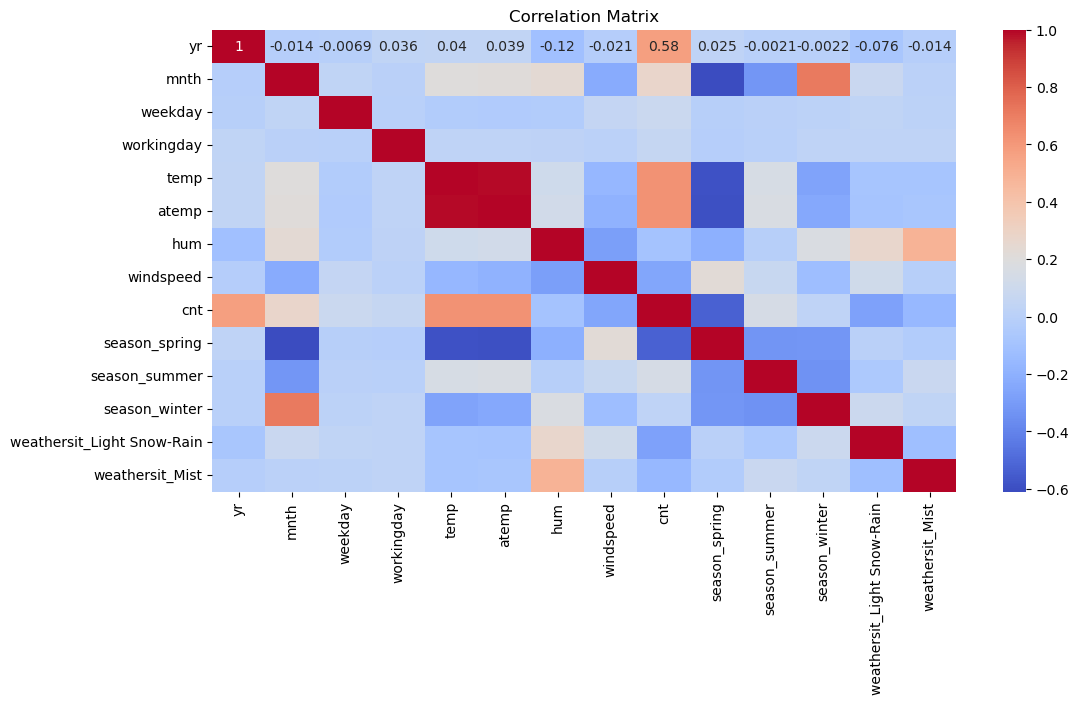

In [990]:
# Correlation between features

plt.figure(figsize=(12, 6))
sns.heatmap(encoded_data_train.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Initial Model Building

In [991]:
# Mapping X_train and y_train --> cnt (i.e. Total Bike rental users is the target variable)

X_train = encoded_data_train.drop(['cnt'], axis = 1)
y_train = encoded_data_train['cnt']

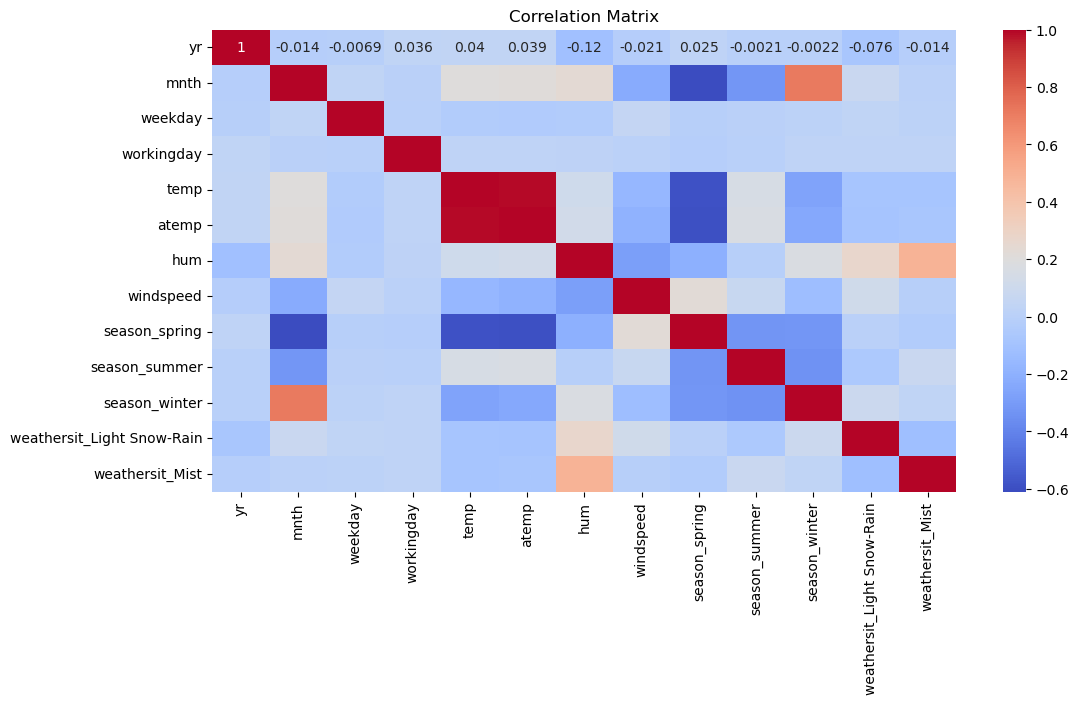

In [992]:
# Corellation in X_train features
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [993]:
# add constant to suffice Linear Equation
X_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

In [994]:
# Check Parameters

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     199.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.32e-187
Time:                        13:42:48   Log-Likelihood:                 500.86
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     496   BIC:                            -914.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2367      0.040      5.878      0.000       0.158       0.316
yr                             0.2422      0.008     29.188      0.000       0.226       0.258
mnth                          -0.0129      0.028     -0.463      0.644      -0.068       0.042
weekday                        0.0769      0.012      6.203      0.000       0.053       0.101
workingday                     0.0163      0.009      1.838      0.067      -0.001       0.034
temp                           0.4534      0.136      3.323      0.001       0.185       0.721
atemp                          0.0550      0.137      0.400      0.689      -0.215       0.325
hum                           -0.0983      0.039     -2.542      0.011      -0.174      -0.022
windspeed                     -0.1515      0.029     -5.312      0.000      -0.208      -0.095
season_spring                 -0.0978      0.024     -4.109      0.000      -0.145      -0.051
season_summer                  0.0334      0.016      2.152      0.032       0.003       0.064
season_winter                  0.0794      0.019      4.277      0.000       0.043       0.116
weathersit_Light Snow-Rain    -0.2382      0.026     -9.128      0.000      -0.289      -0.187
weathersit_Mist               -0.0597      0.011     -5.331      0.000      -0.082      -0.038
==============================================================================
Omnibus:                       98.314   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.077
Skew:                          -0.911   Prob(JB):                     6.22e-64
Kurtosis:                       6.221   Cond. No.                         91.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating VIF

In [995]:
# Creating a  dataframe which contain all the feature variablesand their respective VIF value

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [996]:
vif

,Features,VIF
4,temp,381.56
5,atemp,369.64
6,hum,29.06
1,mnth,14.30
7,windspeed,6.30
10,season_winter,4.90
8,season_spring,4.68
2,weekday,3.24
3,workingday,3.24
9,season_summer,2.83


#### Considering the above sceanrio for both 'mnth' and'atemp' (i.e. Temperatute feel) p-value is very high but incase of atemp the VIF value is also very high. So in such a case we need to remove the 'atemp' feature.

In [997]:
X = X_train.drop('atemp', axis = 1)

X.head()

,yr,mnth,weekday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
573,1.0,0.545455,1.000000,0,0.868126,0.632030,0.278224,0,0,0,0,0
262,0.0,0.727273,0.333333,1,0.626185,0.908115,0.232053,0,0,0,0,1
310,0.0,0.909091,0.166667,1,0.418510,0.781880,0.071811,0,0,1,0,0
436,1.0,0.181818,0.333333,1,0.630338,0.636324,0.442323,1,0,0,0,0
292,0.0,0.818182,0.666667,1,0.519232,0.655646,0.824380,0,0,1,0,0


##### Repeating the model evaluation process post removing 'atemp' - Iteration 2

In [998]:
# add constant to suffice Linear Equation
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

In [1002]:
# Check Parameters

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          9.50e-189
Time:                        13:44:24   Log-Likelihood:                 500.77
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2368      0.040      5.885      0.000       0.158       0.316
yr                             0.2421      0.008     29.211      0.000       0.226       0.258
mnth                          -0.0131      0.028     -0.470      0.638      -0.068       0.042
weekday                        0.0767      0.012      6.198      0.000       0.052       0.101
workingday                     0.0162      0.009      1.829      0.068      -0.001       0.034
temp                           0.5063      0.033     15.132      0.000       0.441       0.572
hum                           -0.0975      0.039     -2.529      0.012      -0.173      -0.022
windspeed                     -0.1535      0.028     -5.468      0.000      -0.209      -0.098
season_spring                 -0.0970      0.024     -4.093      0.000      -0.144      -0.050
season_summer                  0.0343      0.015      2.237      0.026       0.004       0.064
season_winter                  0.0807      0.018      4.416      0.000       0.045       0.117
weathersit_Light Snow-Rain    -0.2387      0.026     -9.165      0.000      -0.290      -0.188
weathersit_Mist               -0.0598      0.011     -5.341      0.000      -0.082      -0.038
==============================================================================
Omnibus:                       97.215   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.332
Skew:                          -0.902   Prob(JB):                     4.04e-63
Kurtosis:                       6.204   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Also calculate the VIF

In [1003]:
# Creating VIF value for new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [1004]:
vif

,Features,VIF
5,hum,28.97
4,temp,16.65
1,mnth,14.30
6,windspeed,6.09
9,season_winter,4.74
7,season_spring,4.61
2,weekday,3.24
3,workingday,3.24
8,season_summer,2.74
11,weathersit_Mist,2.27


##### The p-value of 'mnth' is very high compared to others so removing 'mnth' feature

In [1005]:
X = X.drop('mnth', axis = 1)

X.head()

,yr,weekday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
573,1.0,1.000000,0,0.868126,0.632030,0.278224,0,0,0,0,0
262,0.0,0.333333,1,0.626185,0.908115,0.232053,0,0,0,0,1
310,0.0,0.166667,1,0.418510,0.781880,0.071811,0,0,1,0,0
436,1.0,0.333333,1,0.630338,0.636324,0.442323,1,0,0,0,0
292,0.0,0.666667,1,0.519232,0.655646,0.824380,0,0,1,0,0


##### Repeating the model evaluation process post removing 'mnth' - Iteration 3

In [1006]:
# add constant to suffice Linear Equation
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

In [1010]:
# Check Parameters

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          6.73e-190
Time:                        13:46:22   Log-Likelihood:                 500.66
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     498   BIC:                            -926.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2299      0.037      6.134      0.000       0.156       0.304
yr                             0.2420      0.008     29.230      0.000       0.226       0.258
weekday                        0.0764      0.012      6.187      0.000       0.052       0.101
workingday                     0.0163      0.009      1.845      0.066      -0.001       0.034
temp                           0.5062      0.033     15.140      0.000       0.440       0.572
hum                           -0.0991      0.038     -2.581      0.010      -0.175      -0.024
windspeed                     -0.1535      0.028     -5.473      0.000      -0.209      -0.098
season_spring                 -0.0912      0.020     -4.514      0.000      -0.131      -0.051
season_summer                  0.0380      0.013      2.873      0.004       0.012       0.064
season_winter                  0.0771      0.017      4.646      0.000       0.045       0.110
weathersit_Light Snow-Rain    -0.2387      0.026     -9.173      0.000      -0.290      -0.188
weathersit_Mist               -0.0596      0.011     -5.332      0.000      -0.082      -0.038
==============================================================================
Omnibus:                       96.703   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.876
Skew:                          -0.900   Prob(JB):                     2.28e-62
Kurtosis:                       6.182   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Also calculate the VIF

In [1011]:
# Creating VIF value for new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [1012]:
vif

,Features,VIF
4,hum,25.50
3,temp,15.54
5,windspeed,5.92
6,season_spring,3.85
2,workingday,3.24
1,weekday,3.18
8,season_winter,3.18
7,season_summer,2.30
10,weathersit_Mist,2.23
0,yr,2.04


##### The p-value of 'workingday' is significantly high compared to others so removing 'workingday' feature



In [1013]:
X = X.drop('workingday', axis = 1)

X.head()

,yr,weekday,temp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
573,1.0,1.000000,0.868126,0.632030,0.278224,0,0,0,0,0
262,0.0,0.333333,0.626185,0.908115,0.232053,0,0,0,0,1
310,0.0,0.166667,0.418510,0.781880,0.071811,0,0,1,0,0
436,1.0,0.333333,0.630338,0.636324,0.442323,1,0,0,0,0
292,0.0,0.666667,0.519232,0.655646,0.824380,0,0,1,0,0


##### Repeating the model evaluation process post removing 'workingday' - Iteration 4

In [1014]:
# add constant to suffice Linear Equation
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

In [1015]:
# Check Parameters

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     259.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.21e-190
Time:                        13:47:58   Log-Likelihood:                 498.92
No. Observations:                 510   AIC:                            -975.8
Df Residuals:                     499   BIC:                            -929.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2377      0.037      6.367      0.000       0.164       0.311
yr                             0.2425      0.008     29.229      0.000       0.226       0.259
weekday                        0.0763      0.012      6.160      0.000       0.052       0.101
temp                           0.5103      0.033     15.262      0.000       0.445       0.576
hum                           -0.0999      0.038     -2.596      0.010      -0.176      -0.024
windspeed                     -0.1530      0.028     -5.443      0.000      -0.208      -0.098
season_spring                 -0.0893      0.020     -4.417      0.000      -0.129      -0.050
season_summer                  0.0388      0.013      2.932      0.004       0.013       0.065
season_winter                  0.0790      0.017      4.756      0.000       0.046       0.112
weathersit_Light Snow-Rain    -0.2369      0.026     -9.086      0.000      -0.288      -0.186
weathersit_Mist               -0.0588      0.011     -5.251      0.000      -0.081      -0.037
==============================================================================
Omnibus:                      104.723   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.961
Skew:                          -0.974   Prob(JB):                     2.21e-67
Kurtosis:                       6.263   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Also calculate the VIF

In [1016]:
# Creating VIF value for new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [1017]:
vif

,Features,VIF
3,hum,25.37
2,temp,15.13
4,windspeed,5.90
5,season_spring,3.78
1,weekday,3.18
7,season_winter,3.13
6,season_summer,2.28
9,weathersit_Mist,2.23
0,yr,2.04
8,weathersit_Light Snow-Rain,1.30


##### p-value is significantly low, considering the thresold value of 5 for VIF, we see 'hum' has very high  VIF. So removing the 'hum' feature for further valuation.

In [1018]:
X = X.drop('hum', axis = 1)

X.head()

,yr,weekday,temp,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
573,1.0,1.000000,0.868126,0.278224,0,0,0,0,0
262,0.0,0.333333,0.626185,0.232053,0,0,0,0,1
310,0.0,0.166667,0.418510,0.071811,0,0,1,0,0
436,1.0,0.333333,0.630338,0.442323,1,0,0,0,0
292,0.0,0.666667,0.519232,0.824380,0,0,1,0,0


##### Repeating the model evaluation process post removing 'hum' - Iteration 5

In [1019]:
# add constant to suffice Linear Equation
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

In [1020]:
# Check Parameters

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     283.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.59e-190
Time:                        13:48:47   Log-Likelihood:                 495.50
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     500   BIC:                            -928.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1798      0.030      5.971      0.000       0.121       0.239
yr                             0.2454      0.008     29.693      0.000       0.229       0.262
weekday                        0.0781      0.012      6.284      0.000       0.054       0.103
temp                           0.4942      0.033     14.956      0.000       0.429       0.559
windspeed                     -0.1273      0.026     -4.811      0.000      -0.179      -0.075
season_spring                 -0.0928      0.020     -4.571      0.000      -0.133      -0.053
season_summer                  0.0370      0.013      2.783      0.006       0.011       0.063
season_winter                  0.0723      0.017      4.381      0.000       0.040       0.105
weathersit_Light Snow-Rain    -0.2672      0.023    -11.393      0.000      -0.313      -0.221
weathersit_Mist               -0.0762      0.009     -8.456      0.000      -0.094      -0.059
==============================================================================
Omnibus:                      100.491   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.766
Skew:                          -0.952   Prob(JB):                     1.08e-61
Kurtosis:                       6.097   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Also calculate the VIF

In [1021]:
# Creating VIF value for new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [1022]:
vif

,Features,VIF
3,windspeed,5.78
2,temp,4.62
1,weekday,3.16
4,season_spring,2.23
0,yr,2.02
5,season_summer,1.90
6,season_winter,1.75
8,weathersit_Mist,1.47
7,weathersit_Light Snow-Rain,1.09


##### In this iteration we see, p-value is higher than the 0.05 thresold for 'windspeed', also we can see the VIF value is within the thresold for all features. So removing 'windspeed' feature for further evaluation.

In [1023]:
X = X.drop('windspeed', axis = 1)

X.head()

,yr,weekday,temp,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
573,1.0,1.000000,0.868126,0,0,0,0,0
262,0.0,0.333333,0.626185,0,0,0,0,1
310,0.0,0.166667,0.418510,0,0,1,0,0
436,1.0,0.333333,0.630338,1,0,0,0,0
292,0.0,0.666667,0.519232,0,0,1,0,0


##### Repeating the model evaluation process post removing 'season_summer' - Iteration 6

In [1024]:
# add constant to suffice Linear Equation
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

In [1025]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     303.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.58e-186
Time:                        13:49:59   Log-Likelihood:                 483.96
No. Observations:                 510   AIC:                            -949.9
Df Residuals:                     501   BIC:                            -911.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1397      0.030      4.726      0.000       0.082       0.198
yr                             0.2461      0.008     29.145      0.000       0.230       0.263
weekday                        0.0751      0.013      5.920      0.000       0.050       0.100
temp                           0.4973      0.034     14.729      0.000       0.431       0.564
season_spring                 -0.1054      0.021     -5.124      0.000      -0.146      -0.065
season_summer                  0.0292      0.013      2.167      0.031       0.003       0.056
season_winter                  0.0729      0.017      4.321      0.000       0.040       0.106
weathersit_Light Snow-Rain    -0.2807      0.024    -11.800      0.000      -0.327      -0.234
weathersit_Mist               -0.0760      0.009     -8.249      0.000      -0.094      -0.058
==============================================================================
Omnibus:                       93.222   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.803
Skew:                          -0.908   Prob(JB):                     1.89e-53
Kurtosis:                       5.850   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Also calculate the VIF

In [1026]:
# Creating VIF value for new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [1027]:
vif

,Features,VIF
2,temp,3.37
1,weekday,3.11
0,yr,2.02
4,season_summer,1.67
5,season_winter,1.57
3,season_spring,1.49
7,weathersit_Mist,1.47
6,weathersit_Light Snow-Rain,1.07


#### After multiple iteration we see both p-value and VIF within thresold - We can consider this as Final model

#### Residual Analysis

In [1028]:
# Final model is lr_model

# Compute the y_train_predict value using final model

y_train_predict = lr_model.predict(X_train_sm)
y_train_predict

573    0.892651
262    0.400156
310    0.433215
436    0.618985
292    0.520843
         ...   
150    0.637554
230    0.514118
654    0.742081
67     0.142593
271    0.608104
Length: 510, dtype: float64

C:\Users\Sourish\AppData\Local\Temp\ipykernel_42284\3198435140.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)
C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

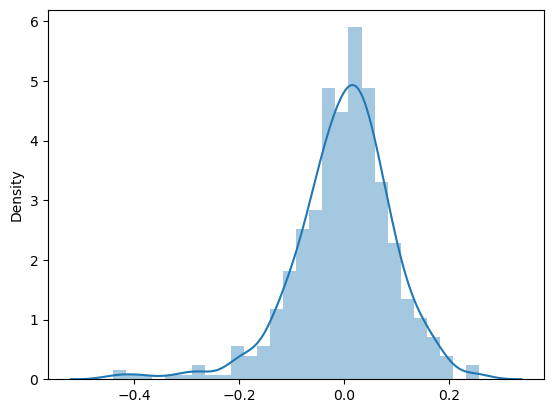

In [1029]:
residual = y_train - y_train_predict

sns.distplot(residual)

#### Evaluation of Test set

In [1030]:
# As the training data set has been scaled previously, similarly  test data set has to be scaled to get proper prediction. (Use of MinMax scaler)

var_list = ['yr', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

encoded_data_test[var_list] = scaler.transform(encoded_data_test[var_list])
encoded_data_test.head()

,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
24,0.0,0.000000,0.333333,1,0.204785,0.208024,0.635765,0.221420,0.234444,1,0,0,0,1
640,1.0,0.818182,0.500000,1,0.745598,0.695922,0.817947,0.091026,0.901708,0,0,1,0,1
143,0.0,0.363636,0.333333,1,0.748713,0.703523,0.763417,0.380769,0.533859,0,1,0,0,1
390,1.0,0.000000,0.666667,1,0.352054,0.370641,0.793044,0.105148,0.484056,1,0,0,0,1
339,0.0,1.000000,0.333333,1,0.502618,0.504924,0.978531,0.433320,0.307178,0,0,1,1,0


In [1031]:
encoded_data_test.describe()

,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.504545,0.503306,0.493182,0.663636,0.544308,0.530088,0.644716,0.334988,0.529097,0.277273,0.231818,0.222727,0.018182,0.390909
std,0.501120,0.316872,0.342831,0.473542,0.241790,0.231816,0.141582,0.152894,0.241978,0.448673,0.422956,0.417026,0.133913,0.489067
min,0.000000,0.000000,0.000000,0.000000,0.047675,0.030227,0.323744,0.041051,0.048847,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.166667,0.000000,0.326422,0.335790,0.524259,0.226278,0.325063,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.500000,1.000000,0.566998,0.568754,0.641477,0.314107,0.540905,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.833333,1.000000,0.754943,0.721401,0.755152,0.424701,0.718918,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.984424,1.019437,1.002146,0.797450,1.038099,1.000000,1.000000,1.000000,1.000000,1.000000


In [1032]:
# Mapping X_test and y_test --> cnt (i.e. Total Bike rental users is the target variable)

X_test = encoded_data_test.drop(['cnt'], axis = 1)
y_test = encoded_data_test['cnt']

In [1033]:
# add constant to suffice Linear Equation
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
24,1.0,0.0,0.000000,0.333333,1,0.204785,0.208024,0.635765,0.221420,1,0,0,0,1
640,1.0,1.0,0.818182,0.500000,1,0.745598,0.695922,0.817947,0.091026,0,0,1,0,1
143,1.0,0.0,0.363636,0.333333,1,0.748713,0.703523,0.763417,0.380769,0,1,0,0,1
390,1.0,1.0,0.000000,0.666667,1,0.352054,0.370641,0.793044,0.105148,1,0,0,0,1
339,1.0,0.0,1.000000,0.333333,1,0.502618,0.504924,0.978531,0.433320,0,0,1,1,0


In [1034]:
X_test_sm = X_test_sm.drop(['atemp', 'mnth', 'workingday', 'hum', 'windspeed'], axis = 1)

In [1035]:
X_test_sm.head()

,const,yr,weekday,temp,season_spring,season_summer,season_winter,weathersit_Light Snow-Rain,weathersit_Mist
24,1.0,0.0,0.333333,0.204785,1,0,0,0,1
640,1.0,1.0,0.500000,0.745598,0,0,1,0,1
143,1.0,0.0,0.333333,0.748713,0,1,0,0,1
390,1.0,1.0,0.666667,0.352054,1,0,0,0,1
339,1.0,0.0,0.333333,0.502618,0,0,1,1,0


#### Now we can start with prediction process

In [1036]:
y_test_predict = lr_model.predict(X_test_sm)

In [1038]:
y_test_predict

24     0.085247
640    0.791048
143    0.490313
390    0.429650
339    0.206846
         ...   
449    0.667231
544    0.928672
569    0.839494
400    0.332605
651    0.745328
Length: 220, dtype: float64

#### Evaluate R^2

In [1043]:
# r2_score(y_test, y_pred)

r2_score(y_test, y_test_predict)

0.773699995403888

### The final training set had R^2 value as 0.829 which is near to test set i.e. 0.774. So, we can conclude that the result is pretty good, with some loss in performance for unseen data.

#### Based on the model we can conclude 3 important feature affecting the demand of shared bike:
#### 1. Temperature (With rise in Temperature, demand of shared bikes increases)
#### 2. Light Snow/Rainfall (With rise Light Snow/Rainfall, demand of shared bike decreases)
#### 3. Year (With each passing year the demand of shared bikes increases)

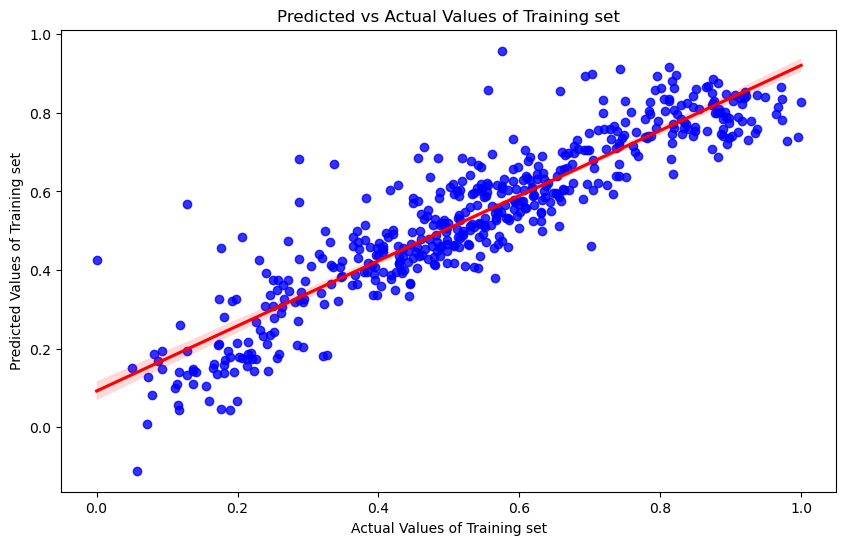

In [1049]:
plt.figure(figsize=(10,6))
sns.regplot(x = y_train, y = y_train_predict, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
plt.xlabel('Actual Values of Training set')
plt.ylabel('Predicted Values of Training set')
plt.title('Predicted vs Actual Values of Training set')
plt.show()

#### Plotting Residual vs Predicted value

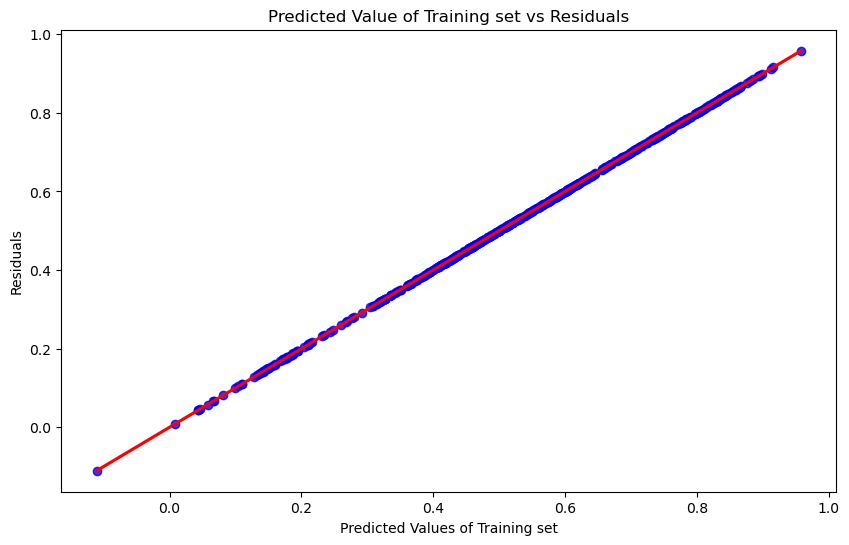

In [1048]:
plt.figure(figsize=(10,6))
sns.regplot(x = y_train_predict, y = y_train_predict, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
plt.xlabel('Predicted Values of Training set')
plt.ylabel('Residuals')
plt.title('Predicted Value of Training set vs Residuals')
plt.show()

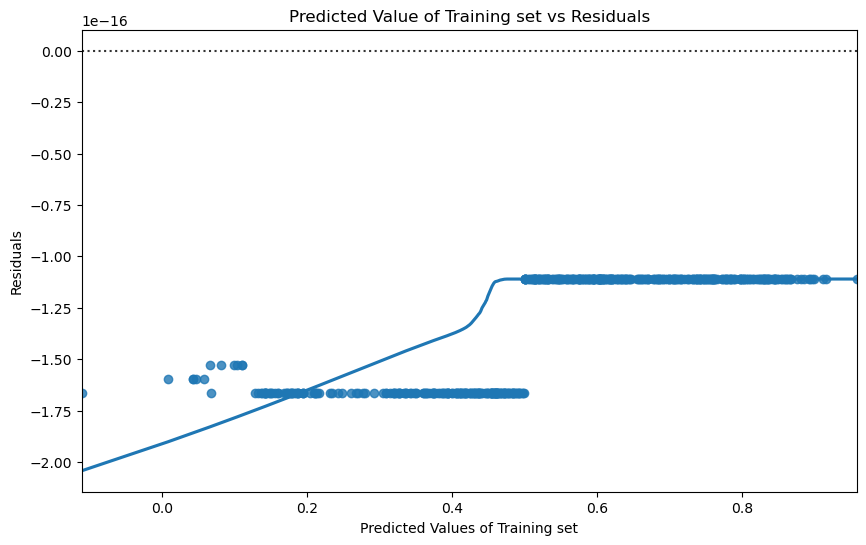

In [1057]:
plt.figure(figsize=(10,6))
sns.residplot(x = y_train_predict, y = y_train_predict, lowess = True)
plt.xlabel('Predicted Values of Training set')
plt.ylabel('Residuals')
plt.title('Predicted Value of Training set vs Residuals')
plt.show()